In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\fruit dataset"))
from subprocess import check_output

['.ipynb_checkpoints', 'test', 'train', 'Untitled.ipynb']


In [2]:
np.random.seed(1234)
directory= r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\fruit dataset\train"
classes=["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [3]:
directory2 = r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\Hack4Good\New dataset\fruit dataset\test"
classes2 =["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [4]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [5]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (503, 100, 100, 3)
shape of X_test=   (211, 100, 100, 3)


In [6]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=6)
Y_test=to_categorical(Y_test,num_classes=6)

In [7]:
Y_train.shape

(503, 6)

In [8]:
Y_test.shape

(211, 6)

In [9]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=100
batch_size=18

In [22]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )


Epoch 1/100
22/22 [==============================] - 2s 86ms/step - loss: 2.1819 - accuracy: 0.1894 - val_loss: 1.7973 - val_accuracy: 0.1287
Epoch 2/100
22/22 [==============================] - 2s 78ms/step - loss: 1.7872 - accuracy: 0.1823 - val_loss: 1.7921 - val_accuracy: 0.1683
Epoch 3/100
22/22 [==============================] - 2s 86ms/step - loss: 1.7742 - accuracy: 0.1953 - val_loss: 1.7916 - val_accuracy: 0.1782
Epoch 4/100
22/22 [==============================] - 2s 89ms/step - loss: 1.7834 - accuracy: 0.1823 - val_loss: 1.7927 - val_accuracy: 0.1782
Epoch 5/100
22/22 [==============================] - 2s 85ms/step - loss: 1.7692 - accuracy: 0.2188 - val_loss: 1.7943 - val_accuracy: 0.1782
Epoch 6/100
22/22 [==============================] - 2s 82ms/step - loss: 1.7708 - accuracy: 0.2135 - val_loss: 1.7957 - val_accuracy: 0.1782
Epoch 7/100
22/22 [==============================] - 2s 83ms/step - loss: 1.7661 - accuracy: 0.2083 - val_loss: 1.7967 - val_accuracy: 0.1782
Epoch 

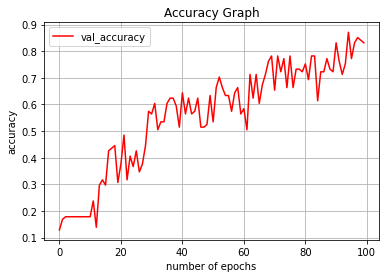

In [23]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

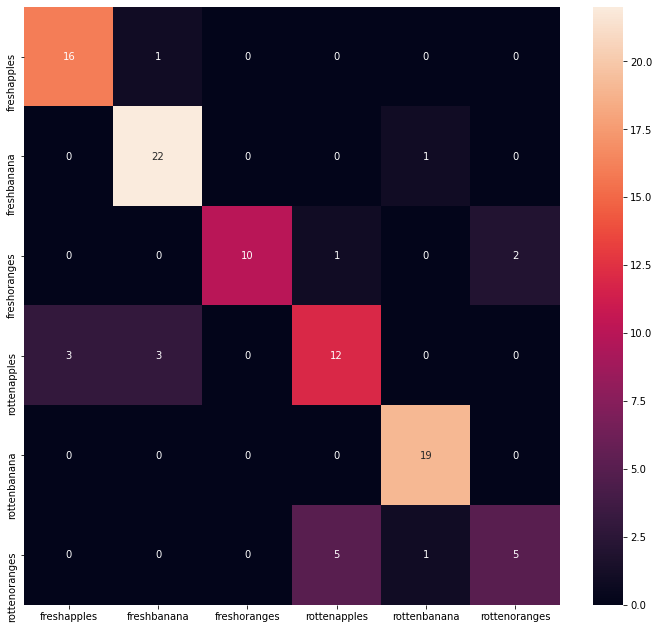

In [24]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred_classes))
# 0 = freshapples
# 1 = freshbanana
# 2 = freshoranges
# 3 = rottenapples
# 4 = rottenbanana
# 5 = rottenoranges

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.85      0.96      0.90        23
           2       1.00      0.77      0.87        13
           3       0.67      0.67      0.67        18
           4       0.90      1.00      0.95        19
           5       0.71      0.45      0.56        11

    accuracy                           0.83       101
   macro avg       0.83      0.80      0.80       101
weighted avg       0.83      0.83      0.82       101



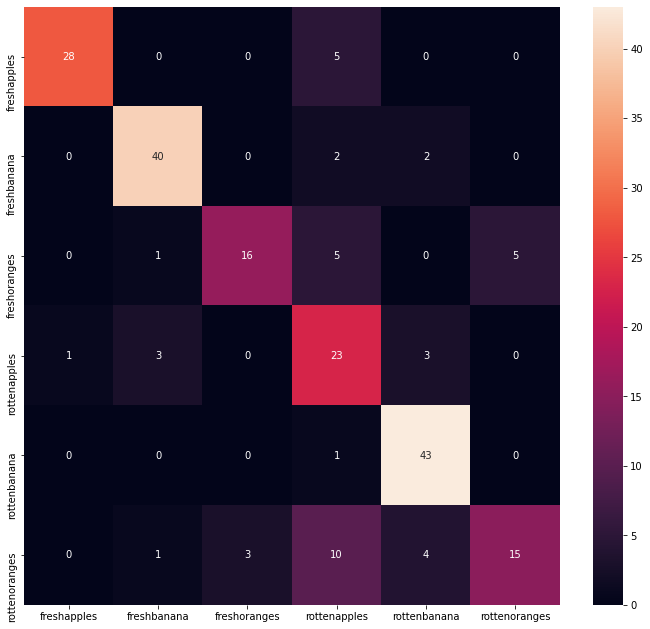

In [26]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

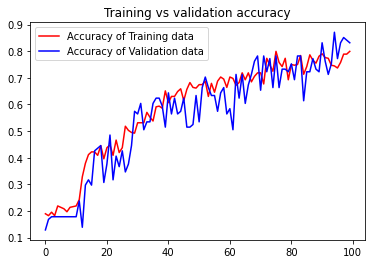

<Figure size 432x288 with 0 Axes>

In [27]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

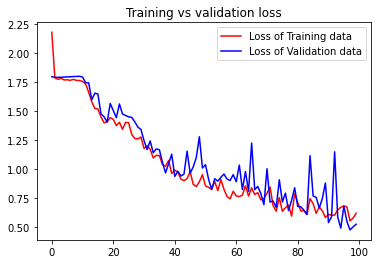

<Figure size 432x288 with 0 Axes>

In [28]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#Test new imported image

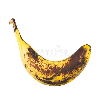

In [78]:
from keras.preprocessing.image import load_img

load_img(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\rotten banana.jpg",target_size=(100,100))

In [79]:
from keras.preprocessing.image import img_to_array



image=load_img(r"C:\Users\20205228\OneDrive - TU Eindhoven\Desktop\rotten banana.jpg",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [80]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
printmd("***Prediction is {}!***".format(fruit_names[value]))

***Prediction is rottenbanana!***